# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** Mateusz Karpiak

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [3]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


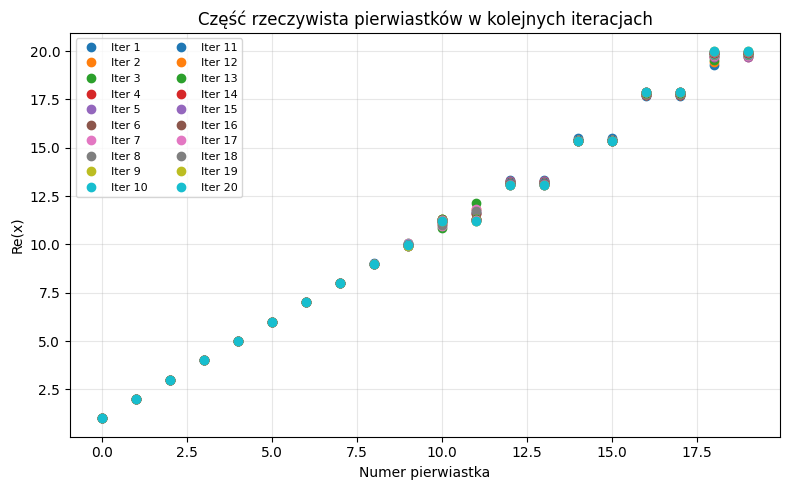

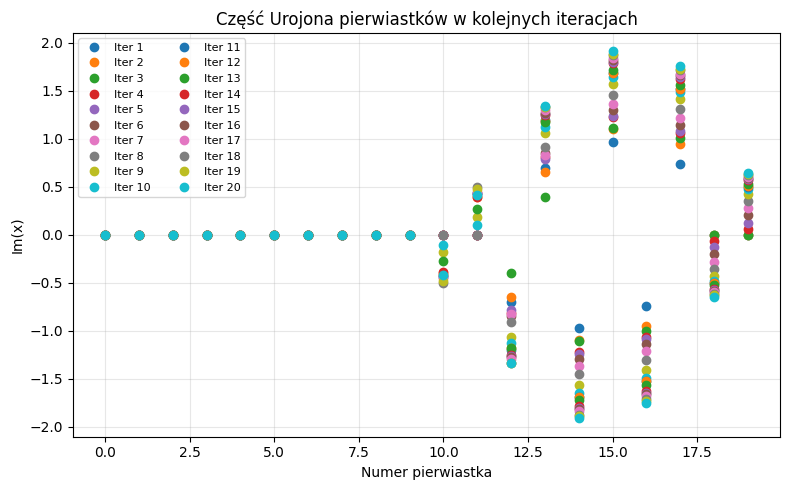

In [38]:
# ===== Punkt 3 z Zadania 1 – wersja z opisami wykresów =====

r = np.arange(1, 21)
a2 = nppoly.polyfromroots(r)

coef = a2.copy()
real = []
imag = []

for it in range(20):
    coef, roots = roots_20(coef)
    real.append(np.real(roots))
    imag.append(np.imag(roots))

plt.figure(figsize=(8,5))
for it, x in enumerate(real):
    plt.plot(x, marker='o', linestyle='', label=f"Iter {it+1}", markersize=6)

plt.title("Część rzeczywista pierwiastków w kolejnych iteracjach", fontsize=12)
plt.xlabel("Numer pierwiastka", fontsize=10)
plt.ylabel("Re(x)", fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()


plt.figure(figsize=(8,5))
for it, y in enumerate(imag):
    plt.plot(y, marker='o', linestyle='', label=f"Iter {it+1}", markersize=6)

plt.title("Część Urojona pierwiastków w kolejnych iteracjach", fontsize=12)
plt.xlabel("Numer pierwiastka", fontsize=10)
plt.ylabel("Im(x)", fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()

plt.show()


Najbardziej narażone na zakłócenia są pierwiastki 12-16. Najmniej pierwiastki 0-9, są one wyznaczone identycznie. Na wykresach widać rozjazd wartości od pierwiastka 10. Wcześniejsze pierwiatski są wyznaczone identycznie do wartości prawdziwych.

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

Fw3=array([[  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
       [ -1.,   8., -28.,  56., -70.,  56., -28.,   8.]])
Wartości_Fw3=array([1.01904738+0.00796691j, 1.01904738-0.00796691j,
       1.00770347+0.01904716j, 1.00770347-0.01904716j,
       0.99203361+0.01878426j, 0.99203361-0.01878426j,
       0.98121553+0.00770398j, 0.98121553-0.00770398j])
Wartości własne macierzy Fw3: [1.01896519+0.00796366j 1.00763966+0.01898228j 0.9920388 +0.01868756j
 1.01898218-0.00791991j 0.98129171+0.00764208j 0.98131261-0.00768975j
 1.0076834 -0.01896141j 0.99208646-0.01870452j]
Pierwiastki wielomianu w3: [0.97789688-0.00901967j 0.97789688+0.00901967j 0.99051571-0.

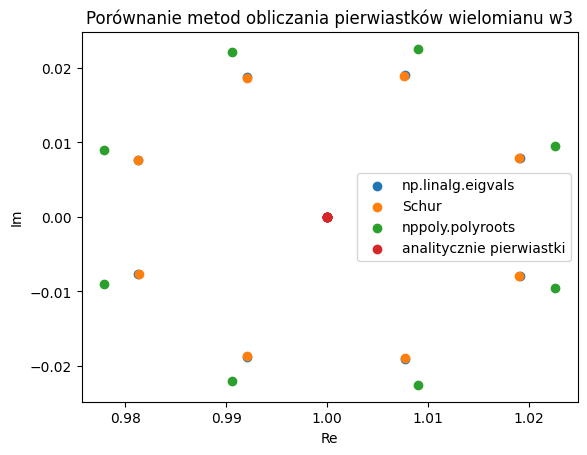

In [23]:
# ===== Twoja implementacja tutaj =====
from main import frob_a
#pkt 1
w3 = nppoly.polyfromroots(8*[1])
Fw3=frob_a(w3)
print(f'{Fw3=}')
#pkt 2
Wartości_Fw3=np.linalg.eigvals(Fw3)
print(f'{Wartości_Fw3=}')
T, Q = sp.linalg.schur(Fw3, output='complex')
eig_schur = np.diag(T)
print(f'Wartości własne macierzy Fw3: {eig_schur}')
polyroots_w3=nppoly.polyroots(w3)
print(f'Pierwiastki wielomianu w3: {polyroots_w3}')

plt.figure()
plt.scatter(np.real(Wartości_Fw3), np.imag(Wartości_Fw3),label="np.linalg.eigvals")
plt.scatter(np.real(eig_schur), np.imag(eig_schur),label="Schur")
plt.scatter(np.real(polyroots_w3), np.imag(polyroots_w3),label="nppoly.polyroots")
plt.scatter([1]*8, [0]*8, label="analitycznie pierwiastki")

plt.title("Porównanie metod obliczania pierwiastków wielomianu w3")
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.show()

Wszystkie metody dały wartości podobne, bliskie dokładnej. Najgorzej poradziła sobie metoda z postacią Frobeniusa. 

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

Wartości_Fw4=array([-3.00000000e+00+0.00000000e+00j,  3.00000000e+00+0.00000000e+00j,
        1.50001805e+00+0.00000000e+00j,  1.49999098e+00+1.56299118e-05j,
        1.49999098e+00-1.56299118e-05j,  4.44089210e-16+7.07106781e-01j,
        4.44089210e-16-7.07106781e-01j])
Wartości własne macierzy Fw3: [-3.00000000e+00+7.77156117e-16j  3.00000000e+00+1.39905448e-15j
 -1.85921685e-16+7.07106781e-01j  1.49998866e+00+1.49003528e-05j
  1.49999277e+00-1.72736150e-05j  1.50001858e+00+2.37326211e-06j
  1.31251855e-17-7.07106781e-01j]
Pierwiastki wielomianu w4: [-3.33333333e-01+0.00000000e+00j  1.46757606e-15-1.41421356e+00j
  1.46757606e-15+1.41421356e+00j  3.33333333e-01+0.00000000e+00j
  6.66660600e-01+0.00000000e+00j  6.66669700e-01-5.25437970e-06j
  6.66669700e-01+5.25437970e-06j]


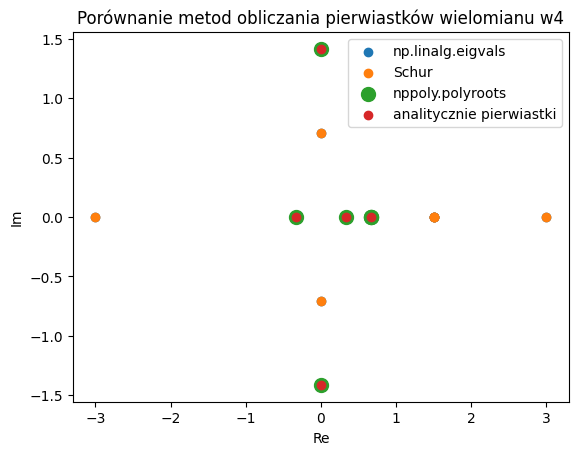

In [21]:
# ===== Twoja implementacja tutaj =====
from main import frob_a
from math import sqrt
w4=[243,-486,783,-990,558,-28,-72,16]
Fw4=frob_a(np.asarray(w4))
Wartości_Fw4=np.linalg.eigvals(Fw4)
print(f'{Wartości_Fw4=}')
T, Q = sp.linalg.schur(Fw4, output='complex')
eig_schur = np.diag(T)
print(f'Wartości własne macierzy Fw3: {eig_schur}')
polyroots_w4=nppoly.polyroots(w4[::-1])
print(f'Pierwiastki wielomianu w4: {polyroots_w4}')

plt.figure()
plt.scatter(np.real(Wartości_Fw4), np.imag(Wartości_Fw4),label="np.linalg.eigvals")
plt.scatter(np.real(eig_schur), np.imag(eig_schur),label="Schur")
plt.scatter(np.real(polyroots_w4), np.imag(polyroots_w4),s=100,label="nppoly.polyroots")
plt.scatter([-(1/3),(1/3),(2/3),0,0], [0,0,0,-sqrt(2),sqrt(2)], label="analitycznie pierwiastki")

plt.title("Porównanie metod obliczania pierwiastków wielomianu w4")
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.show()

 Uzyskane pierwiastki pokrywają się z analitycznymi wartościami. W porównaniu z wielomianem z rozwiązaniem o krotności 8, wyraźnie pojawiają się różnice między metodami. Przy macierzy Frobeniusa widać największy rozstzał wartości.

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [36]:
# ===== Twoja implementacja tutaj =====
from main import is_nonsingular
from statistics import mean
ns= [10,20,30]

for n in ns:
    diag_vals = 2.0 ** np.arange(1, n+1)

    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")

    A = np.diag(diag_vals)
    eig_A= np.linalg.eigvals(A)
    eig_analityczne = diag_vals

    error= eig_A - eig_analityczne
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max(abs(error)):<18.2e} {mean(error):<18.2e}")

    P=np.random.randint(0,100,size=(n,n))

    while not is_nonsingular(P):
        P=np.diag(np.random.randint(0,100,size=n))
    B=P @ A @ np.linalg.inv(P)
    eig_B= np.linalg.eigvals(B)
    #print(f'Wartości własne macierzy B: {eig_B}\n')
    error= eig_B - eig_analityczne
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max(abs(error)):<18.2e} {mean(error):<18.2e}")

    Q,R =np.linalg.qr(P)
    C=Q @ A @ np.linalg.inv(Q)
    eig_C= np.linalg.eigvals(C)
    #print(f'Wartości własne macierzy C: {eig_C}\n')
    error= eig_C - eig_analityczne
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max(abs(error)):<18.2e} {mean(error):<18.2e}")

    Fa= frob_a(nppoly.polyfromroots(diag_vals[::-1]))
    eig_Fa= np.linalg.eigvals(Fa)
    #print(f'Wartości własne macierzy Fa: {eig_Fa}\n')

    error= eig_Fa - eig_analityczne
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max(abs(error)):<18.2e} {mean(error):<18.2e}\n")

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    1.02e+03           -3.28e-13         
   C_10 (Q*A*Q^T)     1.02e+03           -7.53e-14         
   F_10 (Frobenius)   1.02e+03           -2.18e-13         

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    1.05e+06           4.31e-11          
   C_20 (Q*A*Q^T)     1.05e+06           5.17e-11          
   F_20 (Frobenius)   1.05e+06           1.46e-10          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    1.07e+09           2.01e-09          
   C_30 (Q*A*Q^T)     1.07e+09           

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

Wartości własne macierzy diagonalnych obarczone są bardzo małym błędem. Metoda z macierzą P radzi sobie najgorzej. Metoda z macierzą Frobeniusa daje największe błędy wartości własnych.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)